In [44]:
import pandas as pd

data=pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,45.26
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,35.85
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,35.21
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,34.13
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,34.22


In [45]:
y=data.pop('median_house_value')
N,p=data.shape
print('Dataset contains {} samples and {} features. \n'.format(N,p))
print(data.describe())

Dataset contains 20640 samples and 8 features. 

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    20433.000000  20640.000000  20640.000000   20640.000000  
mean       537.870553   1425.476744    499.539680       3.870671  
std        421.385070   1132.462122    382.329753       1.899822  
min          1.000000      3.000000      1.

In [46]:
print("\nNumber of missing values in each feature: ")
print(data.isnull().sum())


Number of missing values in each feature: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64


In [47]:
samples_with_missing_values=data.isnull().any(axis=1)
y=y[~samples_with_missing_values]
x=data.dropna()
print(x.shape,y.shape)

(20433, 8) (20433,)


In [62]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3,metric='euclidean')
knn_reg.fit(x,y)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [49]:
x_test= x.iloc[3:4,:]

y_hat_test = knn_reg.predict(x_test)
print("Actual target value for the sample in index 3 = {:.2f}".format(y[3]))
print("The estimated value for the sample in index 3 = {:.2f}".format(y_hat_test[0]))

Actual target value for the sample in index 3 = 34.13
The estimated value for the sample in index 3 = 27.07


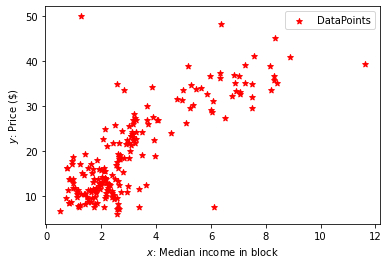

In [50]:
import matplotlib.pyplot as plt

x_new =x.copy()
x_new = x_new.loc[range(200),"median_income"]
y_new = y.copy()
y_new = y_new.loc[range(200)]

fig,ax = plt.subplots()
ax.scatter(x_new,y_new, label="DataPoints", color='red', marker='*')
ax.set_xlabel("$x $: Median income in block")
ax.set_ylabel("$y $: Price (\$)")
ax.legend()

plt.show()



In [43]:
x_new = x_new.values
x_new = x_new.reshape(-1, 1)
knn_reg_new = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn_reg_new.fit(x_new, y_new)


KNeighborsRegressor(metric='euclidean', n_neighbors=3)

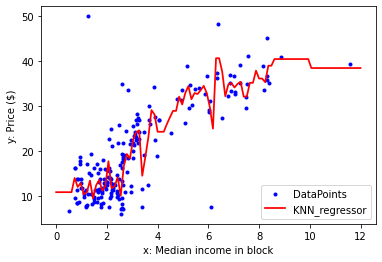

In [56]:
import numpy as np
fig,ax = plt.subplots()
ax.scatter(x_new,y_new,label="DataPoints",color='blue',marker='.')
ax.set_xlabel("x: Median income in block")
ax.set_ylabel("y: Price (\$)")

x_test = np.linspace(0,12,100).reshape(-1,1)
y_pred = knn_reg_new.predict(x_test)
plt.plot(x_test,y_pred,color='red',linewidth=1.75,label='KNN_regressor')

ax.legend()
plt.show()


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_test=knn_reg.predict(x)
mse=mean_squared_error(y,y_test)
mae=mean_absolute_error(y,y_test)
r2=r2_score(y,y_test)

print("Training set MSE= {:.2f}".format(mse))
print("Training set MAE= {:.2f}".format(mae))
print("Training set R-sqaured= {:.2f}".format(r2))

Training set MSE= 53.23
Training set MAE= 5.55
Training set R-sqaured= 0.60
